In [ ]:
#Import some fun things
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import pandas
import math as m
from sklearn.cluster import KMeans
import scipy.stats as stats
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from kneed import KneeLocator
from astropy.coordinates import match_coordinates_sky
#from astroML.datasets import generate_mu_z
#from astroML.linear_model import (LinearRegression, PolynomialRegression,
#                                  BasisFunctionRegression, NadarayaWatson)

pd.set_option('display.max_rows', None)

png_dir_path = os.getcwd() + '/png/'

if not os.path.exists(png_dir_path):
    os.makedirs(png_dir_path)

In [2]:
####SYFERT CATALOG
#hdul_SyGal = fits.open("asu.fit",format='ascii')
#df_SyGal = pandas.DataFrame(hdul_SyGal[2].data)
#df_SyGal

#####NUSTAR CATALOG
#labels = [i for i in range(3,41)]
#print(np.where(df_NuMaster["RA"] == float)[0])
#df_NuMaster = df_NuMaster.iloc(np.where(df_NuMaster["RA"] == float)[0])
#df_NuMaster

In [165]:
# Load BASS Survey Data
path = "/uufs/chpc.utah.edu/common/home/u1234585/Multi-Wavelength-Analysis-main/BAT70mo_BASStables_1_3_7_8_9_10_joined_fixed.h5"
df = pd.read_hdf(path)


In [167]:
ngc = df[df["CTPT_NAME"] == "NGC1068"]
ngc_rad = SkyCoord(ra=ngc.RAdeg.values * u.deg,
                   dec = ngc.DECdeg.values * u.deg,
                   frame='icrs')

ngc_ra_rad = np.radians(180 - ngc_rad.ra.degree)
ngc_dec_rad = np.radians(ngc_rad.dec.degree)

df=df[['Z', 'DIST', 'logNH', 'Gamma', 'Ecut', 'R',  'F2-10-intr', 'F20-50-intr', 'F14-150-intr', 'RAdeg', 'DECdeg', 'logL2-10-obs']] #'logNH-tor', 'Temp', 'Gamma-tor', 'l_fscatt-tor', 'Temp-tor',

for keys in df.keys():
    df=df[~np.isnan(df[keys].values)] 


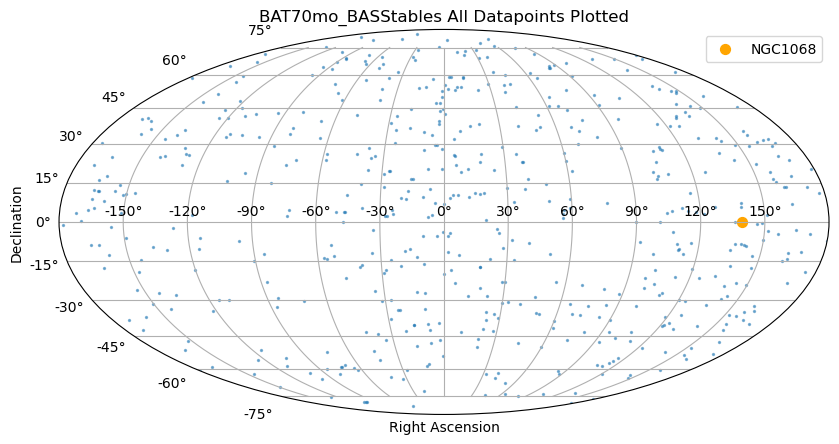

<Figure size 640x480 with 0 Axes>

In [169]:
ra_deg = df['RAdeg']
dec_deg = df['DECdeg']

skycoord = SkyCoord(ra=ra_deg.values * u.deg,
                  dec=dec_deg.values * u.deg,
                  frame='icrs')

ra_rad = np.radians(180 - skycoord.ra.degree)
dec_rad = np.radians(skycoord.dec.degree)

plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")
ax.scatter(ra_rad, dec_rad, 
                   alpha=0.5, s=2)
ax.scatter(ngc_ra_rad, ngc_dec_rad, alpha=1, s=50, c='orange', label="NGC1068")
plt.legend()
plt.grid(True)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title(f"BAT70mo_BASStables All Datapoints Plotted")
plt.savefig(png_dir_path + f"./cluster.png")
plt.show()
plt.clf()


/tmp/ipykernel_1495310/2777911222.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(R[cluster_indices], log_L2_10[cluster_indices],


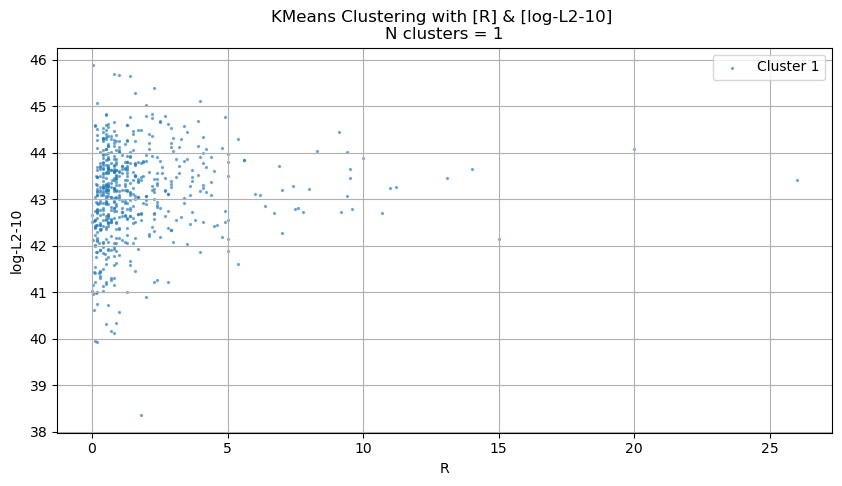

/tmp/ipykernel_1495310/2777911222.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(R[cluster_indices], log_L2_10[cluster_indices],


<Figure size 640x480 with 0 Axes>

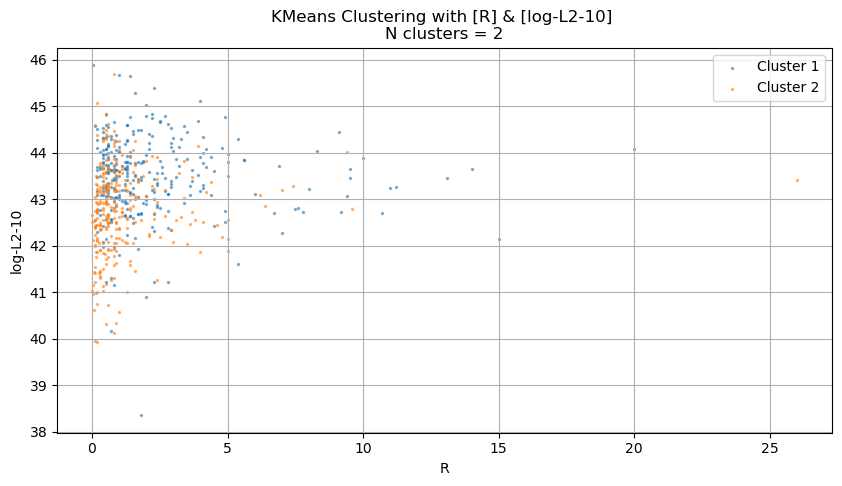

/tmp/ipykernel_1495310/2777911222.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(R[cluster_indices], log_L2_10[cluster_indices],


<Figure size 640x480 with 0 Axes>

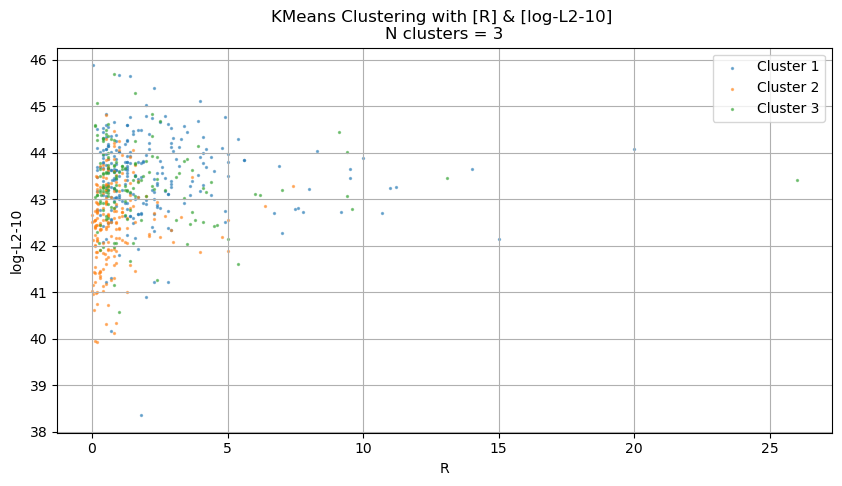

/tmp/ipykernel_1495310/2777911222.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(R[cluster_indices], log_L2_10[cluster_indices],


<Figure size 640x480 with 0 Axes>

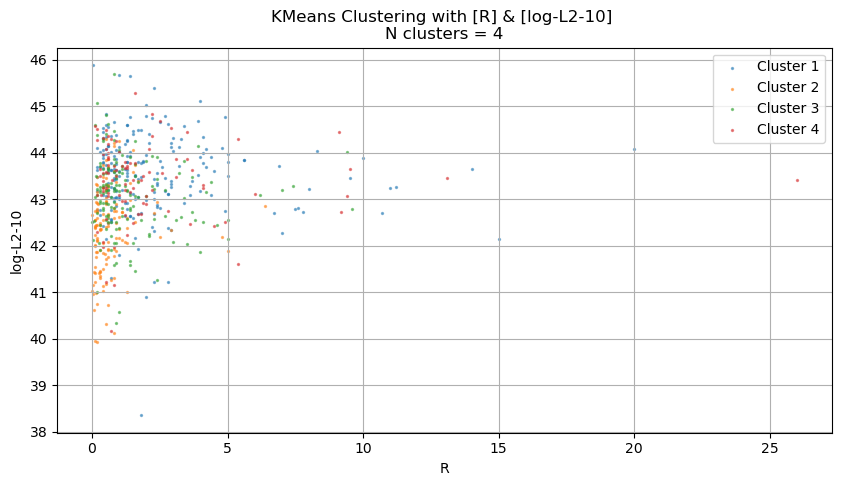

/tmp/ipykernel_1495310/2777911222.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(R[cluster_indices], log_L2_10[cluster_indices],


<Figure size 640x480 with 0 Axes>

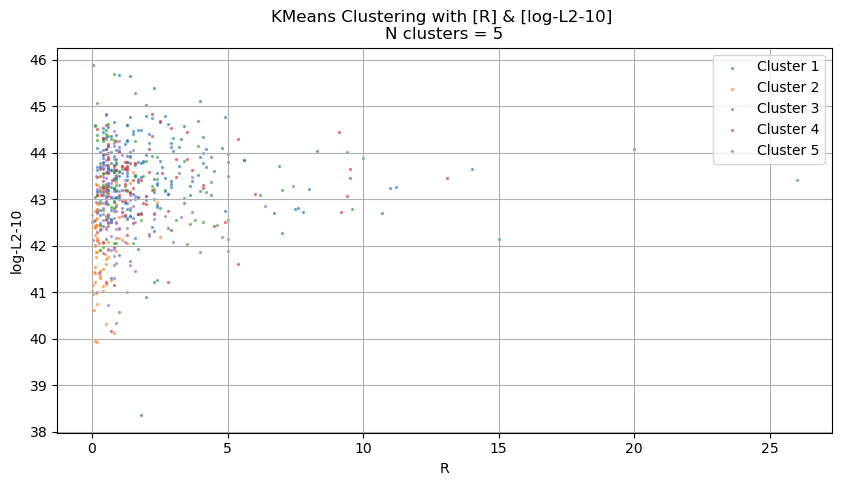

/tmp/ipykernel_1495310/2777911222.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(R[cluster_indices], log_L2_10[cluster_indices],


<Figure size 640x480 with 0 Axes>

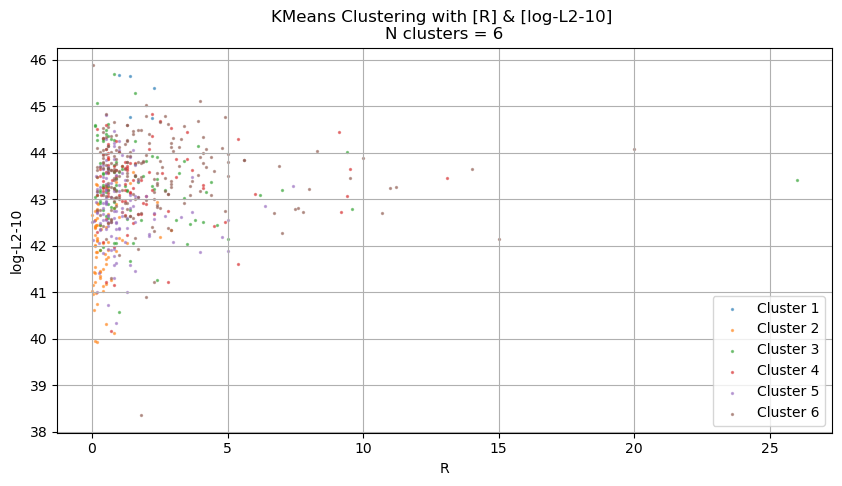

/tmp/ipykernel_1495310/2777911222.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(R[cluster_indices], log_L2_10[cluster_indices],


<Figure size 640x480 with 0 Axes>

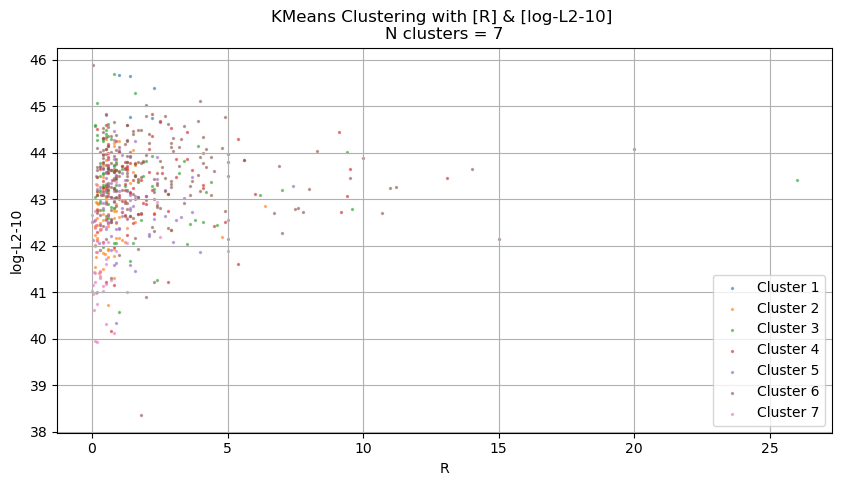

/tmp/ipykernel_1495310/2777911222.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(R[cluster_indices], log_L2_10[cluster_indices],


<Figure size 640x480 with 0 Axes>

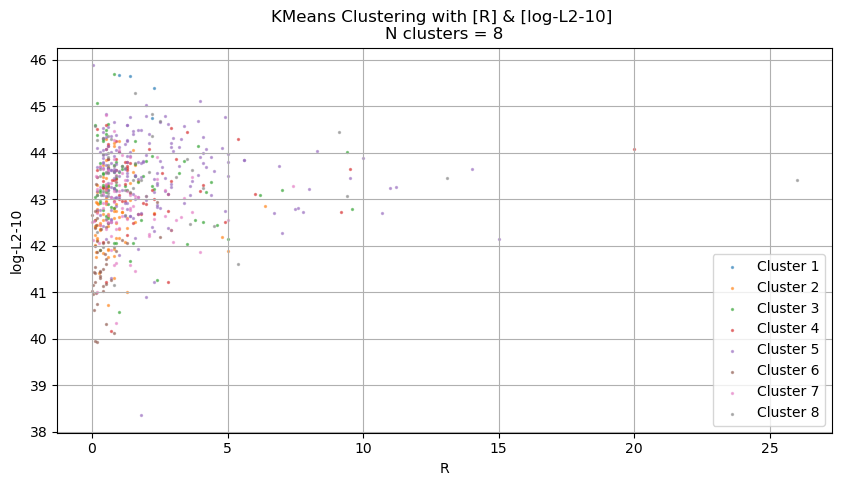

/tmp/ipykernel_1495310/2777911222.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(R[cluster_indices], log_L2_10[cluster_indices],


<Figure size 640x480 with 0 Axes>

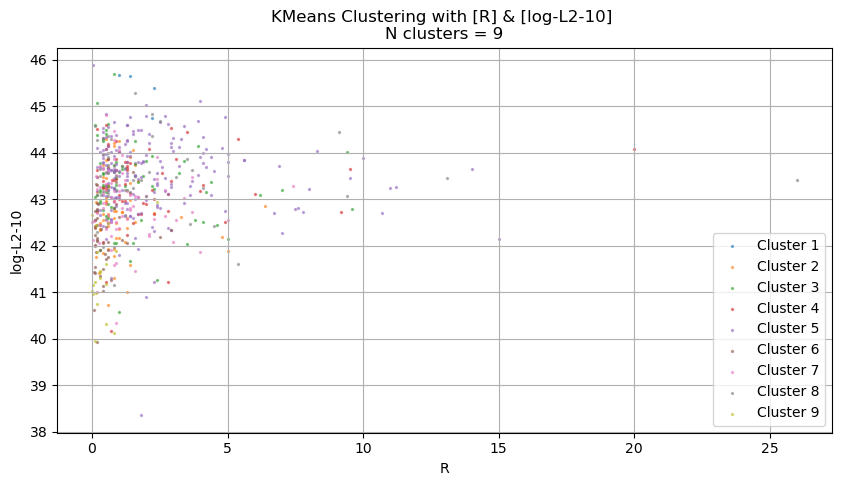

<Figure size 640x480 with 0 Axes>

In [175]:
Gamma = df['Gamma']
logNH = df['logNH']
Z = df['Z']
Ecut = df['Ecut']
R = df['R'].values
F2_10 = df['F2-10-intr']
F20_50 = df['F20-50-intr'] 
F14_150 = df['F14-150-intr']
log_L2_10 = df['logL2-10-obs'].values

data = np.vstack((Z, logNH)).T  # 데이터를 2차원 배열로 조합
N_lst = range(1,10)
inertia=[]

for i in N_lst:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
    labels = kmeans.labels_
    score = kmeans.inertia_
    inertia.append(score)
    plt.figure(figsize=(10, 5))
    ax = plt.subplot(111)
    for label in np.unique(labels):
        cluster_indices = np.where(labels == label)
        ax.scatter(R[cluster_indices], log_L2_10[cluster_indices], 
                   alpha=0.5, s=2, label=f'Cluster {label + 1}', cmap='viridis')
    # ax.scatter(ngc_ra_rad, ngc_dec_rad, alpha=1, s=50, c='orange', label="NGC1068")
    plt.legend()
    plt.grid(True)
    plt.xlabel('R')
    plt.ylabel('log-L2-10')
    plt.title(f"KMeans Clustering with [R] & [log-L2-10] \nN clusters = {i}")
    plt.savefig(png_dir_path + f"./{i}_cluster.png")
    plt.show()
    plt.clf()

# Processing X-ray data

In [40]:
df_NuMaster = pandas.read_csv("heasarc_numaster.tdat.gz.txt",sep="|",
                             skiprows=84,
                             header=None)

df_NuMaster = df_NuMaster[[0,1,2]]
df_NuMaster.columns = ["Name","RA","DEC"]

cut_bad = np.where(np.array(df_NuMaster["RA"],dtype=str) != str(df_NuMaster.iloc[9903]["RA"]))[0]
df_NuMaster = df_NuMaster.iloc[cut_bad]

print("################## X-Ray Data ##################")
print(df_NuMaster, end="\n\n\n\n")

nu_cat = SkyCoord(ra=df_NuMaster["RA"].values * u.deg,
                  dec=df_NuMaster["DEC"].values * u.deg,
                  frame='icrs')

print("----------- X-Ray Catalog (Skycoord Instance) -----------")
print(nu_cat, end="\n\n\n\n")

################## X-Ray Data ##################
                        Name        RA      DEC
0                     ESO5_4   92.0001 -86.6271
1                     ESO5m4   90.7549 -86.6136
2                     ESO5m4   90.6059 -86.6127
3        Deep_background_SCP   90.5007 -86.4285
4        Deep_background_SCP   90.4522 -86.4193
...                      ...       ...      ...
5640              LEDA100168  242.0961  85.0221
5641                VIIZw653  245.9121  85.5081
5642                VIIZw653  245.8783  85.5143
5643  2MASXJ14545815p8554589  223.7403  85.8926
5644  2MASXJ14545815p8554589  223.7859  85.8927

[5645 rows x 3 columns]



----------- X-Ray Catalog (Skycoord Instance) -----------
<SkyCoord (ICRS): (ra, dec) in deg
    [( 92.0001, -86.6271), ( 90.7549, -86.6136), ( 90.6059, -86.6127), ...,
     (245.8783,  85.5143), (223.7403,  85.8926), (223.7859,  85.8927)]>





# Processing Gamma data

In [86]:
###Since, for gamma data, the RA and DECs are written in the 'icrs' format, below function can help you :)
def Ra2Deg(ra):
    ralst = ra.split(" ")
    rasep = ["h", "m", "s"]
    rastr = ''.join([r + s for r, s in zip(ralst, rasep)])
    coord = SkyCoord(rastr, '00d00m00s', frame='icrs')
    ra_angle = coord.ra.deg
    return ra_angle

def Dec2Deg(dec):
    declst = dec.split(" ")
    decsep = ["d", "m", "s"]
    decstr = ''.join([d + s for d, s in zip(declst, decsep)])
    coord = SkyCoord('00h00m00s', decstr, frame='icrs')
    dec_angle = coord.dec.deg
    return dec_angle

df_GammMaster = pandas.read_csv("fermilat_4.txt",sep="|",
                             skiprows=3,
                             header=None)
df_GammMaster = df_GammMaster[[1,2,3]]
df_GammMaster.columns = ["Name","RA","DEC"]

df_GammMaster["RA"] = df_GammMaster["RA"].apply(Ra2Deg)
df_GammMaster["DEC"] = df_GammMaster["DEC"].apply(Dec2Deg)

print("################## Gamma Data ##################")
print(df_GammMaster, end="\n\n\n\n")

gamm_cat = SkyCoord(ra=df_GammMaster["RA"].values * u.deg,
                  dec=df_GammMaster["DEC"].values * u.deg,
                  frame='icrs')

print("----------- Gamma Catalog (Skycoord Instance) -----------")
print(gamm_cat, end="\n\n\n\n")

                    Name          RA        DEC
0     4FGL J0908.5-8751   09 08 35.9  -87 51 58
1     4FGL J1354.1-8750   13 54 10.8  -87 50 23
2     4FGL J0543.5-8741   05 43 34.5  -87 41 10
3     4FGL J2013.9-8717   20 13 55.5  -87 17 05
4     4FGL J1348.5-8700   13 48 30.7  -87 00 47
...                  ...         ...        ...
7190  4FGL J1053.9+8628   10 53 57.7  +86 28 21
7191  4FGL J2307.5+8629c  23 07 34.8  +86 29 46
7192  4FGL J1738.0+8717   17 38 00.2  +87 17 06
7193  4FGL J0140.6+8736   01 40 40.5  +87 36 22
7194  4FGL J1713.7+8844   17 13 47.3  +88 44 15

[7195 rows x 3 columns]


# Plotting Gamma & X-ray

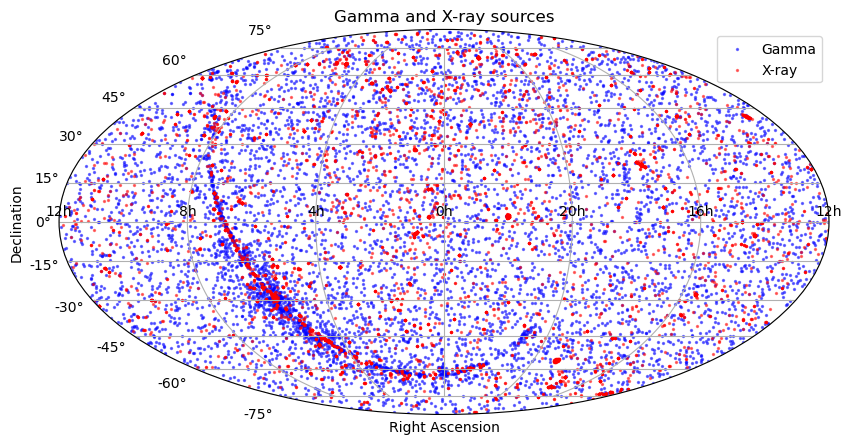

<Figure size 640x480 with 0 Axes>

In [43]:
# 180 - ra
# RA& Dec -> radian
# Use projection "mollweide"
gamma_ra_rad = np.radians(180 - gamm_cat.ra.degree)
gamma_dec_rad = np.radians(gamm_cat.dec.degree)

nu_ra_rad = np.radians(180 - nu_cat.ra.degree)
nu_dec_rad = np.radians(nu_cat.dec.degree)

plt.figure(figsize=(10, 5))
plt.subplot(111, projection="mollweide")

# Scatter plot
plt.scatter(gamma_ra_rad, gamma_dec_rad, alpha=0.5, s=2, color="blue", label="Gamma")
plt.scatter(nu_ra_rad, nu_dec_rad, alpha=0.5, s=2, color="red", label="X-ray")

plt.grid(True)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title('Gamma and X-ray sources')
plt.legend()


plt.xticks(np.radians([-180, -120, -60, 0, 60, 120, 180]),
           ['12h', '8h', '4h', '0h', '20h', '16h', '12h'])

plt.savefig(png_dir_path+"Gamma_Xray.png")
plt.show()
plt.clf()


# Finding Overlaps

In [44]:
idx, d2d, d3d = match_coordinates_sky(nu_cat,gamm_cat)
max_sep = 1.0 #in arcmin
sep_constraint = d2d.deg < max_sep
no_match = d2d.deg > max_sep
no_match
#sy_matches = sy_cat[sep_constraint]
catalog_matches = gamm_cat[idx[sep_constraint]]

# Plotting Overlaps

[ 0.40553452 -0.87944232 -0.63206372 ... -1.04738663 -1.04738663
 -1.04738663]


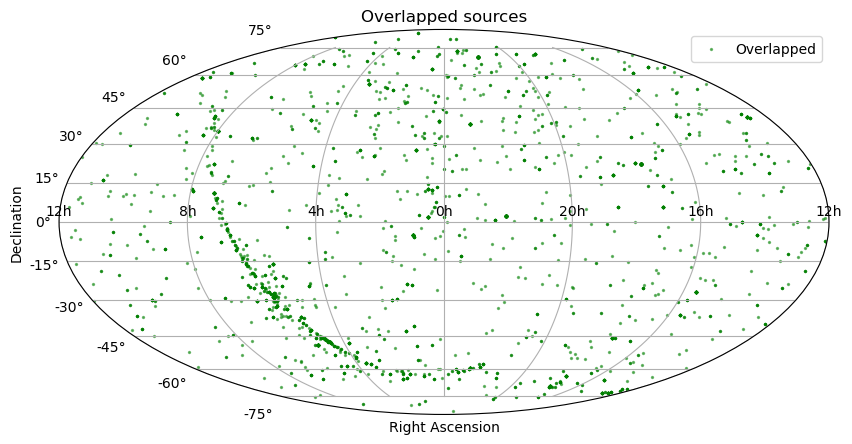

<Figure size 640x480 with 0 Axes>

In [76]:
# 180 - ra
# RA& Dec -> radian
# Use projection "mollweide"

tot_ra_rad = np.radians(180-catalog_matches.ra.degree)
tot_dec_rad = np.radians(catalog_matches.dec.degree)

plt.figure(figsize=(10, 5))
plt.subplot(111, projection="mollweide")

# Scatter plot
plt.scatter(tot_ra_rad, tot_dec_rad, alpha=0.5, s=2, color="green", label="Overlapped")
plt.grid(True)
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title('Overlapped sources')
plt.legend()


plt.xticks(np.radians([-180, -120, -60, 0, 60, 120, 180]),
           ['12h', '8h', '4h', '0h', '20h', '16h', '12h'])
plt.savefig(png_dir_path+"./Overlapped.png")
plt.show()
plt.clf()


# Clustering

In [101]:
data = np.vstack([tot_ra_rad, tot_dec_rad]).T  # 데이터를 2차원 배열로 조합
N_lst = range(1,10)
inertia=[]

for i in N_lst:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
    labels = kmeans.labels_
    score = kmeans.inertia_
    inertia.append(score)
    plt.figure(figsize=(10, 5))
    ax = plt.subplot(111, projection="mollweide")
    for label in np.unique(labels):
        cluster_indices = np.where(labels == label)
        ax.scatter(tot_ra_rad[cluster_indices], tot_dec_rad[cluster_indices], 
                   alpha=0.5, s=2, label=f'Cluster {label + 1}', cmap='viridis')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Right Ascension')
    plt.ylabel('Declination')
    plt.title(f"KMeans Clustering with [RA] & [Dec] \nN clusters = {i}")
    plt.savefig(png_dir_path + f"./{i}_cluster.png")
    plt.show()
    plt.clf()


3405


In [ ]:
knee_locator = KneeLocator(N_lst, inertia, curve='convex', direction='decreasing')
elbow = knee_locator.elbow
print("Elbow point (N_cluster) : ", elbow)

plt.plot(N_lst,inertia)
plt.scatter(N_lst,inertia, label="Inertia")
plt.axvline(elbow, color='red', linestyle='--', label='Elbow')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Inertia vs Number of Clusters")
plt.legend()
plt.savefig(png_dir_path+"./KMeansInertia.png")
plt.show()
plt.clf()